# Spam Text Classification using spacy tool

# What is NLP

NLP is the field of Artificial intelligence.

# Application of NLP
- Text classification
- Spam filters
- Voice text messaging
- Sentence Analysis
- Spell or Grammar check
- Chat Bot
- Automatic Review analysis System

- Natural Language Understanding(Text Classification)
- Natural Language Generation(Text Generation)

# The Process of Natural Language Understanding(Text Classification)

![](img.jpg)

# How to get started with NLP
- Sklearn
- Spacy
- NLTK

In [61]:
! pip install scikit-learn

# Difference between Spacy and NLTK
Spacy                                        
- Faster                                     
- Tokenizer maintains alignment              
- Integrated Word Vector                     
NLTK
- Slow
- Token do not align to original string.
- No word vector support

# For what to use these Libraries
- Tokenziation
- Part of Speech Tagginh
- Entity Detection
- Dependency Parsing
- Noun Phrases
- Word to vector Integration
- Context Derivation

# Data Cleaning Options
- Case Normalization
- Removing Stop Words
- Removing Punctuation or special Symbols
- Lemmetization
- Part of Speech Tagging
- Entity Detection
- Bag of Words
- Word to Vec

# Bag of words and Tf-Idf
## Tf-Tdf= TF(t,d)* Idf(t)
- TF(t) or Term Frequency =number of frequency of a term in a document/total no of terms in that document.
- Idf(t) or inverse Document Frequency =log (number of document/number of document consist term t)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('spam.tsv', sep='\t')

In [3]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
len(df)

5572

In [31]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

# Balance this data

In [7]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [10]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [11]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [12]:
data=ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,U buy newspapers already?,25,1
1,ham,What do u reckon as need 2 arrange transport i...,69,2
2,ham,Still in customer place,23,0
3,ham,I dont. Can you send it to me. Plus how's mode.,47,4
4,ham,So do you have samus shoulders yet,34,0
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


### Exploratory Data Analysis

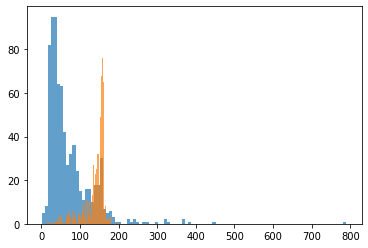

In [13]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()


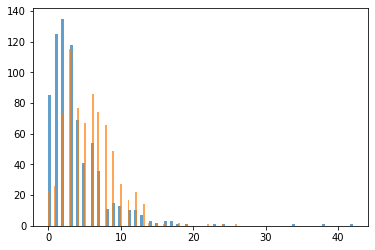

In [14]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

#### Data preparation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
x_train, x_test, y_train,y_test=train_test_split(data['message'],data['label'], test_size=0.3,shuffle=True,stratify=data['label'])

In [17]:
x_train.shape

(1045,)

In [18]:
y_train

1369    spam
493      ham
1090    spam
995     spam
256      ham
        ... 
564      ham
737      ham
932     spam
355      ham
1268    spam
Name: label, Length: 1045, dtype: object

### Bag of Words Creation

In [19]:
vectorizer=TfidfVectorizer()

In [20]:
X_train=vectorizer.fit_transform(x_train)

In [21]:
X_train.shape

(1045, 3817)

In [41]:
1045*3817

3988765

In [22]:
X_train

<1045x3817 sparse matrix of type '<class 'numpy.float64'>'
	with 17838 stored elements in Compressed Sparse Row format>

### Pipeline and RF 

In [42]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [44]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [25]:
y_pred=clf.predict(x_test)

In [26]:
confusion_matrix(y_test,y_pred)

array([[222,   3],
       [ 23, 201]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.9420935412026726

In [45]:
clf.predict(["Hy, Whatsup"])

array(['ham'], dtype=object)

In [28]:
clf.predict(["Lottery won of $100000"])

array(['ham'], dtype=object)

In [33]:
from sklearn.svm import SVC

In [35]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1, gamma='auto'))])

In [37]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',

In [38]:
y_pred=clf.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[  0, 225],
       [  0, 224]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred)

0.49888641425389757